In [1]:
# import packages
using LinearAlgebra, HDF5, Interpolations, DataFrames

using Revise

push!(LOAD_PATH,"../") #path to HF0d.jl
using HF0d

#set up plotting
using PyPlot
function remove_extra_borders!(contourlines)
    for c in contourlines.collections
        c.set_edgecolor("face")
    end
end

#color palettes --- just for aesthetics
using ColorSchemes
cmap = colorschemes[:balance]
rgbtotuple(c) = (c.r,c.g,c.b)
pal = rgbtotuple.(colorschemes[:Set1_9]);

[ Info: Precompiling HF0d [ccd8c7c9-aee5-4f5d-a325-814364d6db47]


# Density of States Profile

In [3]:
N=100000 #large number of points to resolve the peak, but doesn't affect HF much
hfm = HF0d.HFmodel_supermoire(N; Umm=28,Umsm=28,Usmsm=0,W1=20,W2=5,δ=0.075);

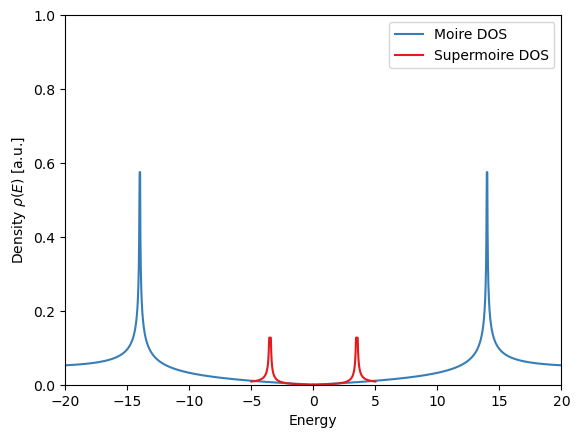

PyObject <matplotlib.legend.Legend object at 0x2bdaae130>

In [45]:
PyPlot.svg(true)

plot(hfm.ϵs[1],hfm.ρs[1],color=pal[2],label="Moire DOS")
plot(hfm.ϵs[5],hfm.ρs[5],color=pal[2])

plot(hfm.ϵs[9],hfm.ρs[9],color=pal[1],label="Supermoire DOS")
plot(hfm.ϵs[13],hfm.ρs[13],color=pal[1])

xlim(-20,20)
ylim(0,1)


# title("Moire and Supermoire Kinetic DOS")
xlabel("Energy")
ylabel(L"Density $\rho(E)$ [a.u.]")
legend()

# Figure 2 Compressibility

In [46]:
dat0 = run_supermoire_model(;
        Umm=28,Umsm=28,Usmsm=0,
        W1=20,W2=5,δ=0.075,
        N=1000, repeats=12,
        μs = -150:0.25:150,
        save_all_species=true);

Running HF (0D). 
μ = -147.75 (10/1201)
μ = -145.25 (20/1201)
μ = -142.75 (30/1201)
μ = -140.25 (40/1201)
μ = -137.75 (50/1201)
μ = -135.25 (60/1201)
μ = -132.75 (70/1201)
μ = -130.25 (80/1201)
μ = -127.75 (90/1201)
μ = -125.25 (100/1201)
μ = -122.75 (110/1201)
μ = -120.25 (120/1201)
μ = -117.75 (130/1201)
μ = -115.25 (140/1201)
μ = -112.75 (150/1201)
μ = -110.25 (160/1201)
μ = -107.75 (170/1201)
μ = -105.25 (180/1201)
μ = -102.75 (190/1201)
μ = -100.25 (200/1201)
μ = -97.75 (210/1201)
μ = -95.25 (220/1201)
μ = -92.75 (230/1201)
μ = -90.25 (240/1201)
μ = -87.75 (250/1201)
μ = -85.25 (260/1201)
μ = -82.75 (270/1201)
μ = -80.25 (280/1201)
μ = -77.75 (290/1201)
μ = -75.25 (300/1201)
μ = -72.75 (310/1201)
μ = -70.25 (320/1201)
μ = -67.75 (330/1201)
μ = -65.25 (340/1201)
μ = -62.75 (350/1201)
μ = -60.25 (360/1201)
μ = -57.75 (370/1201)
μ = -55.25 (380/1201)
μ = -52.75 (390/1201)
μ = -50.25 (400/1201)
μ = -47.75 (410/1201)
μ = -45.25 (420/1201)
μ = -42.75 (430/1201)
μ = -40.25 (440/1201)
μ =

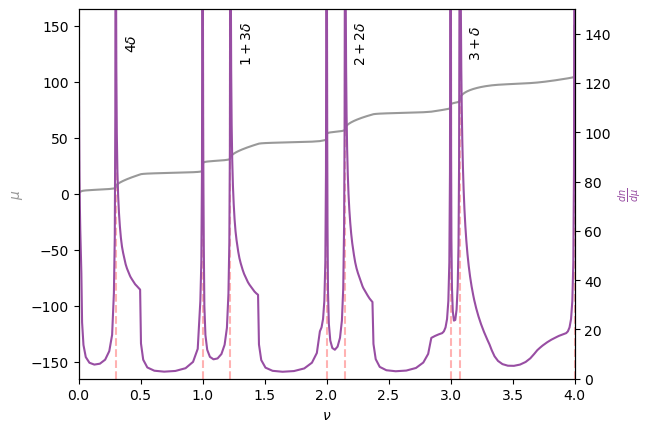

(0.0, 4.0)

In [62]:
PyPlot.svg(true)
fig = figure()
plot(dat0["nus"], dat0["mus"][1:end-1],color=pal[9])

for x in [0,1,2,3,4, 0+4*δ, 1+3*δ,2+2*δ,3+δ]
    axvline(x,color=(1,0,0,0.3),ls="--",zorder=-1)
end

ycoord = 125
text(0+5*δ,ycoord+10,L"$4\delta$",rotation=90,va="center")
text(1+4*δ,ycoord+10,L"$1+3\delta$",rotation=90,va="center")
text(2+3*δ,ycoord+10,L"$2+2\delta$",rotation=90,va="center")
text(3+2*δ,ycoord+10,L"$3+\delta$",rotation=90,va="center")

xlabel(L"$\nu$")
ylabel(L"$\mu$",color=pal[9])

axt = gca().twinx()
axt.plot(dat0["nus"], 1 ./ dat0["kappas"],color=pal[4])
axt.set_ylabel(L"$\frac{dn}{d\mu}$",color=pal[4])
axt.set_ylim(0,5)

ylim(0,150)
xlim(0,4)

### Plot data in the style of Fig 2.

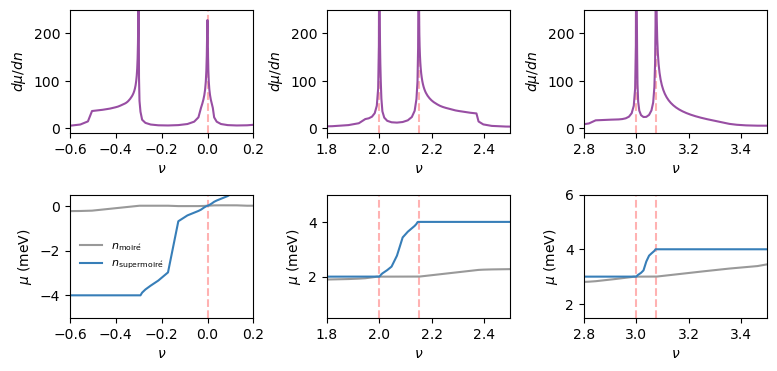

In [49]:
PyPlot.svg(true)
fig, axs = subplots(2,3,figsize=(9,4))

#translate fillings to occupations
ns_moire =  dropdims(mapslices(sum,dat0["nus_all"][1:8,:],dims=1),dims=1)[1:end-1]/(1-δ) .-4
ns_supermoire =  dropdims(mapslices(sum,dat0["nus_all"][9:end,:],dims=1),dims=1)[1:end-1]/(δ) .- 4


δ=0.075
xs = [ [-0.6,0.2], [1.8,2.5], [2.8,3.5] ]
ys = [ [-5,0.5], [0.5,5],[1.5,6]]

for col in [1,2,3]
    sca(axs[1,col])
    plot(dat0["nus"], 1 ./ dat0["kappas"],"-",color=pal[4])
    for n in 0:4
        axvline(n,color=(1,0,0,0.3),ls="--",zorder=-1)
        axvline(n+(4-n)*δ,color=(1,0,0,0.3),ls="--",zorder=1)
    end

    xlabel(L"$\nu$")
    ylabel(L"$d \mu/dn$")
    ylim(-10,250)
    xlim(xs[col])

    #occuptions
    sca(axs[2,col])
    plot(dat0["nus"],ns_moire,label=L"$n_{\mathrm{moir\'e}}$",color=pal[9])
    plot(dat0["nus"],ns_supermoire,label=L"$n_{\mathrm{supermoir\'e}}$",color=pal[2])

    for n in 0:4
        axvline(n,color=(1,0,0,0.3),ls="--",zorder=-1)
        axvline(n+(4-n)*δ,color=(1,0,0,0.3),ls="--",zorder=1)
    end

    xlabel(L"$\nu$")
    ylabel(L"$\mu$ (meV)")
    ylim(ys[col])
    xlim(xs[col])
    col == 1 && legend(frameon=false,fontsize=8)
end

fig.subplots_adjust(wspace=0.4,hspace=0.5)

# Tune $W_{sm}/W_m$ 

### Generate Data and Save to HDF5 for archiving

- Takes about 10 minutes on a modern laptop.
- Decrease the size of $\mu$ steps to speed up.
- For multithreading, follow instructions at
 https://julialang.github.io/IJulia.jl/stable/manual/installation/

In [74]:
folder = "data_Wsm_scan"
isdir(folder) || mkdir(folder) #make the directory if it doesn't exist already
#select a few to avoid convergence issues
W2s = 1:20
generate_Wsm_scan_data(folder, W2s)

6
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
μ = 2.25 (10/601)
μ = 2.25 (10/601)
μ = 4.75 (20/601)
μ = 2.25 (10/601)
μ = 2.25 (10/601)
μ = 2.25 (10/601)
μ = 7.25 (30/601)
μ = 2.25 (10/601)
μ = 4.75 (20/601)
μ = 4.75 (20/601)
μ = 9.75 (40/601)
μ = 4.75 (20/601)
μ = 4.75 (20/601)
μ = 7.25 (30/601)
μ = 4.75 (20/601)
μ = 7.25 (30/601)
μ = 7.25 (30/601)
μ = 7.25 (30/601)
μ = 9.75 (40/601)
μ = 7.25 (30/601)
μ = 9.75 (40/601)
μ = 12.25 (50/601)
μ = 9.75 (40/601)
μ = 12.25 (50/601)
μ = 12.25 (50/601)
μ = 12.25 (50/601)
μ = 14.75 (60/601)
μ = 9.75 (40/601)
μ = 14.75 (60/601)
μ = 14.75 (60/601)
μ = 9.75 (40/601)
μ = 12.25 (50/601)
μ = 17.25 (70/601)
μ = 14.75 (60/601)
μ = 19.75 (80/601)
μ = 22.25 (90/601)
μ = 17.25 (70/601)
μ = 17.25 (70/601)
μ = 24.75 (100/601)
μ = 17.25 (70/601)
μ = 27.25 (110/601)
μ = 19.75 (80/601)
μ = 19.75 (80/601)
μ = 22.25 (90/601)
μ = 22.25 (90/601)
μ = 14.75 (60/601)
μ = 24.75 (100/601)
μ = 12.25 (50/601)

### Load data and turn it into a dataframe for convenience

In [75]:
# folder = "../scripts/data3/"
folder = "data_Wsm_scan/"
files = filter(endswith(".h5"), folder .* readdir(folder))
@show files

df = process_raw_data_files_to_dataframe(files, verbose=false);
sort!(df,:W2)
size(df,1)

files = ["data_Wsm_scan/dat_W2_1.h5", "data_Wsm_scan/dat_W2_10.h5", "data_Wsm_scan/dat_W2_11.h5", "data_Wsm_scan/dat_W2_12.h5", "data_Wsm_scan/dat_W2_13.h5", "data_Wsm_scan/dat_W2_14.h5", "data_Wsm_scan/dat_W2_15.h5", "data_Wsm_scan/dat_W2_16.h5", "data_Wsm_scan/dat_W2_17.h5", "data_Wsm_scan/dat_W2_18.h5", "data_Wsm_scan/dat_W2_19.h5", "data_Wsm_scan/dat_W2_2.h5", "data_Wsm_scan/dat_W2_20.h5", "data_Wsm_scan/dat_W2_3.h5", "data_Wsm_scan/dat_W2_4.h5", "data_Wsm_scan/dat_W2_5.h5", "data_Wsm_scan/dat_W2_6.h5", "data_Wsm_scan/dat_W2_7.h5", "data_Wsm_scan/dat_W2_8.h5", "data_Wsm_scan/dat_W2_9.h5"]


20

### Linear Interpolation

To display as an image, we need evenly spaced $\nu$'s, but
the data has evenly spaced $\mu$'s. To convert, we make a linear interpolation
$$
\kappa(\nu)
$$
and sample it at 20,000 evenly spaced points $\nu_n$.

In [76]:
νs_all = df[!,:nus];
κs_all = df[!,:kappas]
W2s = df[!,:W2]
νs_interp = range(0.0,4.0,length=2000)
κs_interp = []
for (νs,κs) in zip(νs_all,κs_all)
    p = sortperm(νs)
    itp = linear_interpolation(νs[p], κs[p],extrapolation_bc=Interpolations.Line())
    κs0 = itp.(νs_interp)
    push!(κs_interp,κs0)
end
dmudn_interp = 1 ./ stack(κs_interp);

┌ Warning: Duplicated knots were deduplicated. Use Interpolations.deduplicate_knots!(knots) explicitly to avoid this warning.
│   k1 =
│    600-element Vector{Float64}:
│     0.0020701367404001303
│     0.005568196923064761
│     0.015578011505532174
│     0.035744672194020666
│     0.06945736859193552
│     ⋮
│     3.9999999998654143
│     3.9999999998657376
│     3.9999999998701607
│     3.999999999882638
│     3.999999999893843
└ @ Interpolations ~/.julia/packages/Interpolations/91PhN/src/gridded/gridded.jl:77


### Plot Inverse Compressibility

Let's use the same color scheme as the SET data. We cut off the divergences at 100 a.u.

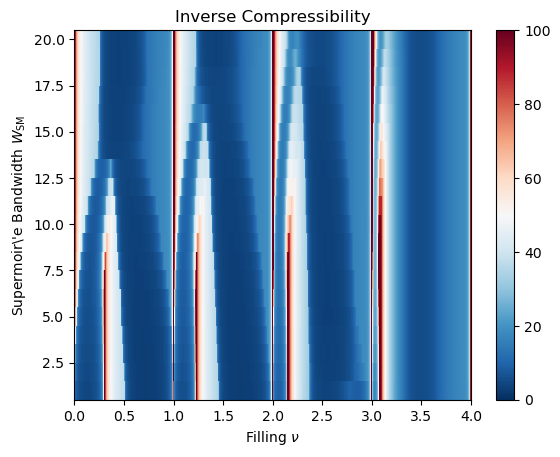

PyObject Text(0.5, 1.0, 'Inverse Compressibility')

In [78]:
pcolormesh(νs_interp, W2s, dmudn_interp',vmin=0,vmax=100,cmap="RdBu_r")
cb = colorbar()
# xlim(0,4)

xlabel(L"Filling $\nu$")
ylabel(L"Supermoir\'e Bandwidth $W_{\mathrm{SM}}$")
title("Inverse Compressibility")
# savefig("inverse_compressibilty_versus_sm_Bandwidth.png")

### Export in Matlab format for Y.X.

In [8]:
using MAT #package for matlab format IO
matwrite("supermore_model_W_sm_scan_data.mat", Dict(
    "W_sm" => W2s,
    "W_m" => [20.0],
	"U_m_m" => [30.0],
    "U_m_sm" => [30.0*0.075],
    "U_sm_sm" => [0.0],
	"nus_interpolated" => collect(νs_interp),
    "dmu_dn_interpolated" => dmudn_interp,
    "nus" => df[!,:nus],
    "nus_total" => df[!,:nustot]
); compress = true)

# Tune $U_m/W_m$

- Takes about 10 minutes on a modern laptop.
- Decrease the size of $\mu$ steps to speed up.
- For multithreading, follow instructions at
 https://julialang.github.io/IJulia.jl/stable/manual/installation/

In [9]:
folder = "data_Um_scan"
#select a few to avoid convergence issues
Umms = [0.0, 8.0, 10.0, 14.0, 16.0, 20.0, 26.0, 28.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0]
generate_Um_scan_data(folder, Umms)

6
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 
Running HF (0D). 


In [30]:
# folder = "../scripts/data_07_scan_Umm_again_again/"
folder = "data_Um_scan/"
files = filter(endswith(".h5"), folder .* readdir(folder))
@show files

df = process_raw_data_files_to_dataframe(files, verbose=false);
sort!(df,:Umm)
df[!,:Um_Wm_ratio] = df.Umm ./ df.W1;
size(df,1)

files = ["data_Um_scan/dat_Um_0.0.h5", "data_Um_scan/dat_Um_10.0.h5", "data_Um_scan/dat_Um_14.0.h5", "data_Um_scan/dat_Um_16.0.h5", "data_Um_scan/dat_Um_20.0.h5", "data_Um_scan/dat_Um_26.0.h5", "data_Um_scan/dat_Um_28.0.h5", "data_Um_scan/dat_Um_38.0.h5", "data_Um_scan/dat_Um_40.0.h5", "data_Um_scan/dat_Um_42.0.h5", "data_Um_scan/dat_Um_44.0.h5", "data_Um_scan/dat_Um_46.0.h5", "data_Um_scan/dat_Um_48.0.h5", "data_Um_scan/dat_Um_50.0.h5", "data_Um_scan/dat_Um_52.0.h5", "data_Um_scan/dat_Um_54.0.h5", "data_Um_scan/dat_Um_56.0.h5", "data_Um_scan/dat_Um_58.0.h5", "data_Um_scan/dat_Um_60.0.h5", "data_Um_scan/dat_Um_8.0.h5"]


20

### Linear Interpolation (Again)

To display as an image, we need evenly spaced $\nu$'s, but
the data has evenly spaced $\mu$'s. To convert, we make a linear interpolation
$$
\kappa(\nu)
$$
and sample it at 20,000 evenly spaced points $\nu_n$.

In [31]:
νs_all = df[!,:nus];
κs_all = df[!,:kappas]
UmWm_ratio = df[!,:Um_Wm_ratio]
νs_interp = range(0.0,4.0,length=2000)
κs_interp = []
for (νs,κs) in zip(νs_all,κs_all)
    p = sortperm(νs)
    itp = linear_interpolation(νs[p], κs[p],extrapolation_bc=Interpolations.Line())
    κs0 = itp.(νs_interp)
    push!(κs_interp,κs0)
end
dmudn_interp = 1 ./ stack(κs_interp);

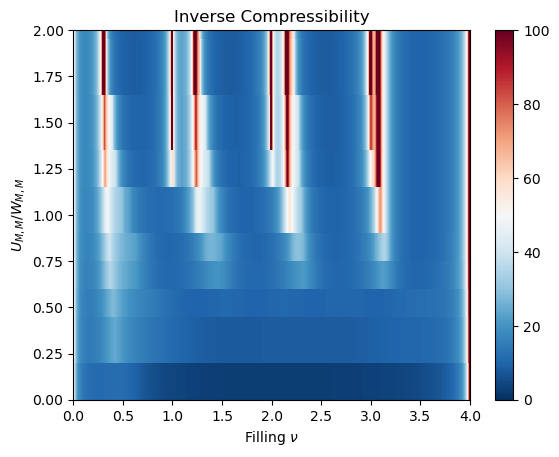

PyObject Text(0.5, 1.0, 'Inverse Compressibility')

In [32]:
pcolormesh(νs_interp, UmWm_ratio, dmudn_interp',vmin=0,vmax=100,cmap="RdBu_r")
cb = colorbar()
xlim(0,4)
ylim(0,2)

xlabel(L"Filling $\nu$")
ylabel(L"$U_{M,M}/W_{M,M}$")
title("Inverse Compressibility")

### Export in Matlab format for Y.X.

In [52]:
using MAT
δ=0.075
matwrite("supermore_model_Umm_Wmm_scan_data.mat", Dict(
    "W_sm" => df[!,:W2][1:1],
    "W_m" => df[!,:W1][1:1],
    "V_m_m" => df[!,:Umm],
    "V_m_sm" => df[!,:Umsm] .* δ,
    "V_sm_sm" => df[!,:Usmsm],
	"U_m_m" => df[!,:Umm],
    "U_m_sm" => df[!,:Umsm],
    "U_sm_sm" => df[!,:Usmsm],
	"nus_interpolated" => collect(νs_interp),
    "dmu_dn_interpolated" => dmudn_interp,
    "nus" => df[!,:nus],
    "nus_total" => df[!,:nustot]
); compress = true)